###### ### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2024 Semester 1

## Assignment 1: Wine quality classification with K-NN


**Student ID(s):**     `1356056`


This iPython notebook is a template which you will use for your Assignment 1 submission.

**NOTE: YOU SHOULD ADD YOUR RESULTS, DIAGRAMS AND IMAGES FROM YOUR OBSERVATIONS IN THIS FILE TO YOUR REPORT (the PDF file).**

**Adding proper comments to your code is MANDATORY. **

## 1. K-NN classifier

In [20]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


wine_train = np.genfromtxt('COMP30027_2024_asst1_data/winequality-train.csv', delimiter=',', skip_header=1)
wine_test = np.genfromtxt('COMP30027_2024_asst1_data/winequality-test.csv', delimiter=',', skip_header=1)

# Extract features (X) and labels (Y)
train_X = wine_train[:, :-1]
train_Y = wine_train[:, -1]
train_Y = train_Y.astype(int)

test_X = wine_test[:, :-1]
test_Y = wine_test[:, -1]

def euclideanDistance(train, test):
    return np.sqrt(np.sum((train - test)**2))


def knnClassifier(train_X, train_Y, test_X, k):
    test_Y = []
    for test_row in test_X:
        #Computing euclidean distances for each point
        distances = []
        for train_row in train_X:
            distances.append(euclideanDistance(train_row, test_row))

        #Finding the k closest rows that are closest to the test row
        index_of_closest = np.argsort(distances)
        labels_of_closest = []
        for i in range(k):
            labels_of_closest.append(train_Y[index_of_closest[i]])

        #Counting labels of k closest neighbours
        max_count = 0

        majority_label = None
        for label in set(labels_of_closest):
            count = sum(1 for x in labels_of_closest if x == label)
            if count > max_count:
                max_count = count
                majority_label = label
            elif count == max_count and count > 1:
                majority_label = labels_of_closest[0]
        test_Y.append(majority_label)
    return test_Y





## 2. 1-NN classification

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer must be submitted separately as a PDF.

## 3. Normalization

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer must be submitted separately as a PDF.

## 4. Model extensions

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer must be submitted separately as a PDF.

### 4.1
Compare the performance of your best 1-NN model from Question 3 to a Gaussian naive Bayes model on this dataset (you may use library functions to implement the Gaussian naive Bayes model). In your write-up, state the accuracy of the naive Bayes model and identify instances where the two models disagree. Why do the two models classify these instances differently?

0.774074074074074
0.7777777777777778


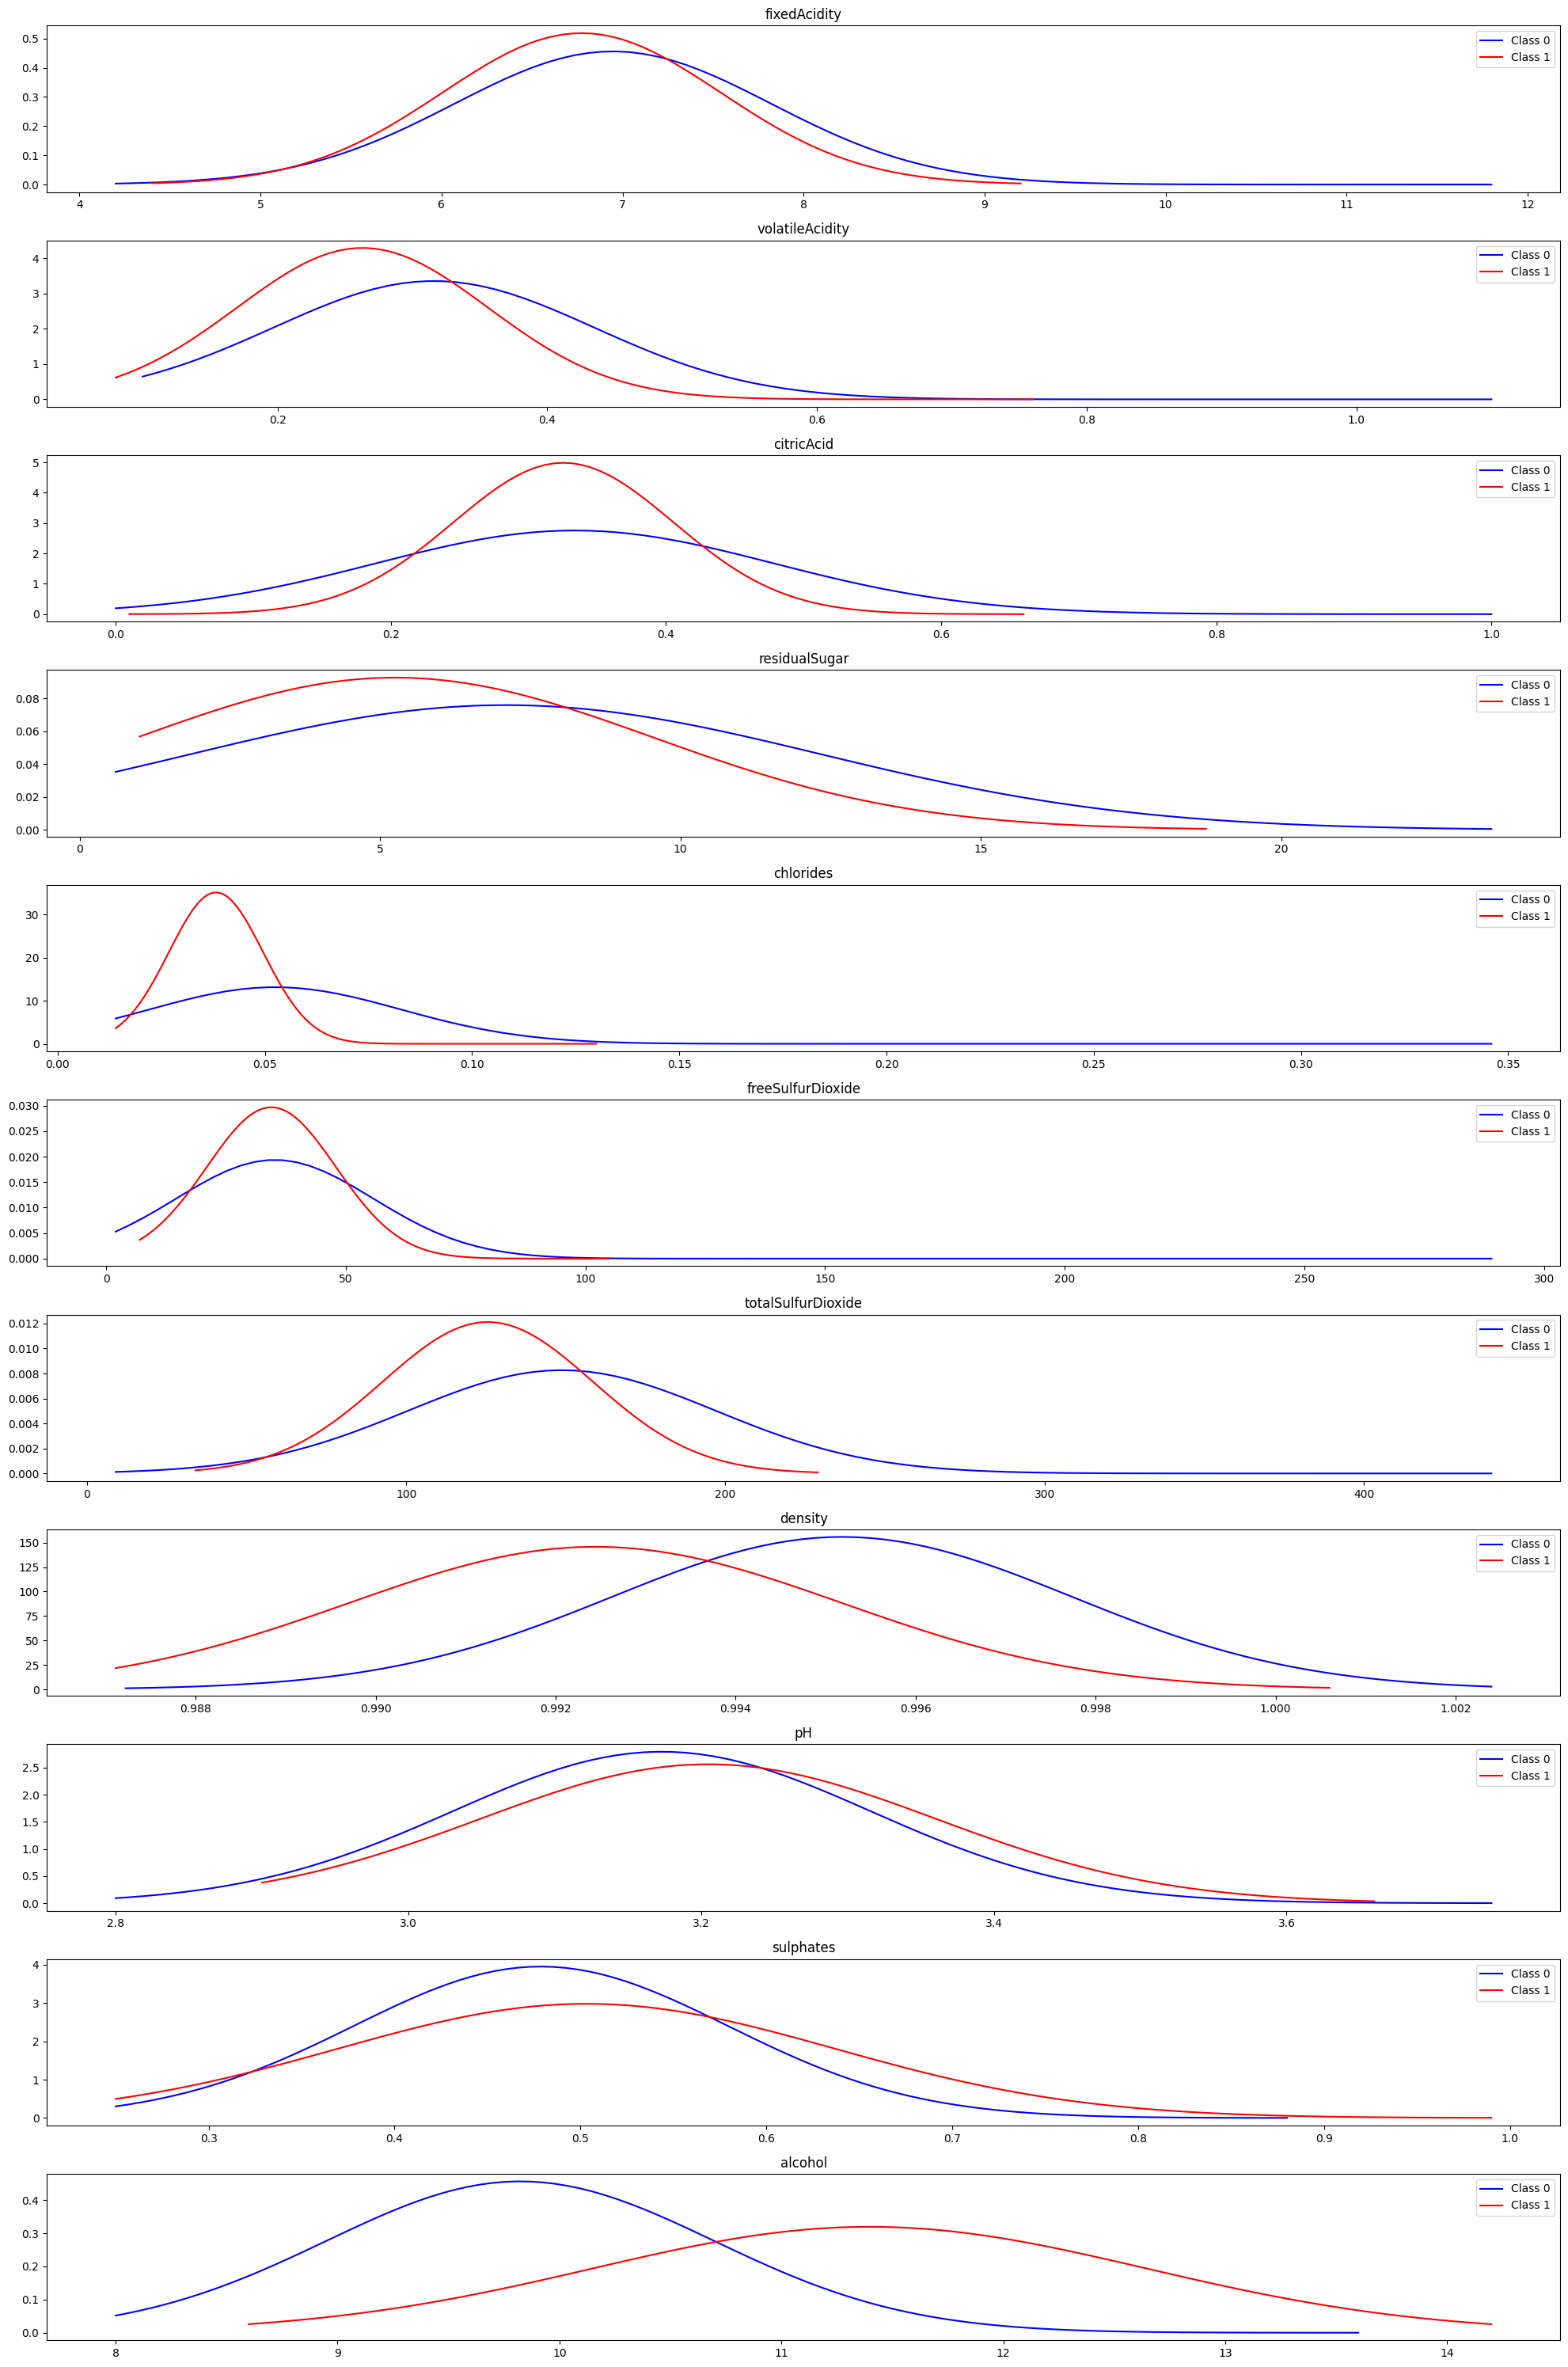

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from scipy.stats import norm


class_priors = np.bincount(train_Y) / len(train_Y)
class_means = np.array([train_X[train_Y == i].mean(axis=0) for i in np.unique(train_Y)])
class_vars = np.array([train_X[train_Y == i].var(axis=0) for i in np.unique(train_Y)])

def normalDistribution(x, mean, var):
    return (1 / np.sqrt(2 * np.pi * var)) * np.exp(-(1 / (2 * var)) * ((x - mean) ** 2))


def gaussianNaiiveBayes(train_X, train_Y, test_X):

    predictions = []
    for x in test_X:
        posteriors = []
        for i in range(len(class_priors)):
            likelihoods = normalDistribution(x, class_means[i], class_vars[i])
            log_likelihoods = np.log(likelihoods)
            posterior = np.log(class_priors[i]) + np.sum(log_likelihoods)
            posteriors.append(posterior)
        predictions.append(np.argmax(posteriors))

    return predictions

def computeAccuracy(prediction, actual):
    number_correct = 0
    for i in range(len(prediction)):
        if prediction[i] == actual[i]:
            number_correct += 1
    return number_correct / len(prediction)


clf = GaussianNB()
clf.fit(train_X, train_Y)

predsk = clf.predict(test_X)
pred = gaussianNaiiveBayes(train_X, train_Y, test_X)
accuracy = accuracy_score(test_Y, pred)
accurac = accuracy_score(test_Y, predsk)

print(accuracy)
print(accurac)

def printPlots():
    class_0 = train_X[train_Y == 0]
    class_1 = train_X[train_Y == 1]

    mean_0 = class_means[0]
    mean_1 = class_means[1]

    var_0 = class_vars[0]
    var_1 = class_vars[1]

    attribute_names = ["fixedAcidity","volatileAcidity","citricAcid","residualSugar","chlorides","freeSulfurDioxide","totalSulfurDioxide","density","pH","sulphates","alcohol"]

    fig, axs = plt.subplots(train_X.shape[1], 1, figsize=(20, 30))

    for i in range(train_X.shape[1]):
        # Plot the Gaussian curve for class 1
        x = np.linspace(class_0[:, i].min(), class_0[:, i].max(), 100)
        axs[i].plot(x, norm.pdf(x, mean_0[i], np.sqrt(var_0[i])), color='blue', label='Class 0')

        # Plot the Gaussian curve for class 2
        x = np.linspace(class_1[:, i].min(), class_1[:, i].max(), 100)
        axs[i].plot(x, norm.pdf(x, mean_1[i], np.sqrt(var_1[i])), color='red', label='Class 1')

        axs[i].set_title(attribute_names[i])
        axs[i].legend()

    plt.tight_layout()
    plt.show()

printPlots()


### 4.2
Implement two additional distance measures for your K-NN model: cosine similarity and Mahalanobis distance (you may use library functions for these distance measures). Do 1-NN classification using each of these new distance measures and the three normalization options from Question 3. Discuss how the new distance metrics compare to Euclidean distance and how each metric is affected by normalization.

### 4.3
Implement either of the two K-NN weighting strategies discussed in lecture (inverse linear distance or inverse distance). Compare the performance of the weighted and majority vote models for a few different values of K. In your write-up, discuss how weighting strategy and the value of K affect the model's decisions.

### 4.4
Measure the empirical distribution of class labels in the training dataset (what percentage of the training data comes from each class). Then evaluate the distribution of labels predicted by your K-NN model for the test data, for a range of values for K. Does the class distribution of the predicted labels match the class distribution of the training data? Explain why or why not.